In [2]:
#import sys
#!conda install --yes --prefix {sys.prefix} pandas numpy matplotlib biopython

Solving environment: done

# All requested packages already installed.



In [3]:
import pandas as pd
import numpy as np
from Bio.PDB import PDBList
from Bio.SVDSuperimposer import SVDSuperimposer
from Bio.PDB.PDBParser import PDBParser
import matplotlib.pyplot as plt

In [4]:
path = ".."
path_data = '../data'
path_figures = '../figures'


import os
if not os.path.exists(path_data) :
  os.mkdir(path_data)
if not os.path.exists(path_figures) :
  os.mkdir(path_figures)

In [5]:
def superimpose(segment_1, segment_2):
  """
  return the new coordinates of segment_2 
  upon superposition with segment_1
  """
  sup = SVDSuperimposer()
  sup.set(segment_1, segment_2)
  sup.run()
  rot, tran = sup.get_rotran()
  return np.dot(segment_2, rot) + tran # the updated coordinate is returned

In [6]:
pdb_id, chain = ['2k0e', 'A'] # 1e8l, 2l3y, 2k0e, 2kkw 

# Fetch a PDB file to the current dir
pdbl = PDBList()
pdbl.retrieve_pdb_file(pdb_id, pdir=path + "/pdb", file_format='pdb') # Will save to pdbXXXX.ent

# Load the structure
structure = PDBParser(QUIET=True).get_structure(pdb_id, path + "/pdb/pdb{}.ent".format(pdb_id))
print('Models', len(structure))
print('Residues', len(structure[0][chain]))

Structure exists: '../pdb/pdb2k0e.ent' 
Models 160
Residues 152


In [7]:
# Select CA coordinates for each models
coords = []
for i, model in enumerate(structure):
    coords.append([atom.get_coord() for atom in model[chain].get_atoms() if atom.get_name() == "CA"])


In [8]:
# models (rows) x residues (columns)
df_coords = pd.DataFrame(coords)
df_coords

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,"[-4.976, 15.017, 4.103]","[-6.382, 12.533, 6.52]","[-9.938, 13.764, 5.986]","[-11.626, 13.675, 2.644]","[-12.442, 16.575, 0.355]","[-15.916, 17.298, -1.1]","[-14.62, 15.987, -4.465]","[-13.428, 12.723, -3.018]","[-16.612, 12.141, -1.022]","[-18.604, 13.002, -4.066]",...,"[0.486, -8.536, 2.226]","[1.86, -7.271, 5.48]","[1.061, -3.654, 4.924]","[-2.455, -4.629, 4.005]","[-3.102, -6.277, 7.301]","[-1.955, -4.255, 10.32]","[-27.083, -3.552, -1.511]","[-22.28, -1.076, 8.979]","[18.286, -6.291, 2.456]","[9.963, -14.176, 3.993]"
1,"[-14.856, 13.1, 11.148]","[-13.788, 16.279, 9.456]","[-15.865, 18.007, 6.85]","[-14.847, 17.268, 3.254]","[-15.463, 19.111, 0.004]","[-18.481, 18.903, -2.298]","[-16.469, 17.58, -5.201]","[-15.011, 14.934, -2.888]","[-18.43, 13.864, -1.507]","[-19.769, 13.575, -5.046]",...,"[4.735, 1.553, 7.197]","[2.081, -0.379, 9.096]","[-0.636, 2.209, 8.672]","[0.192, 2.814, 5.057]","[-0.001, -0.838, 4.273]","[-2.633, -2.389, 6.535]","[-26.936, -2.866, -1.982]","[-21.268, -1.03, 9.084]","[6.757, 6.178, 24.625]","[12.301, -0.812, 16.274]"
2,"[-8.74, 10.885, 11.794]","[-8.038, 12.859, 8.72]","[-10.616, 13.863, 6.25]","[-11.369, 13.445, 2.559]","[-12.496, 16.149, 0.212]","[-16.036, 16.619, -0.868]","[-15.168, 15.969, -4.438]","[-13.723, 12.644, -3.465]","[-16.696, 11.817, -1.293]","[-18.957, 12.667, -4.138]",...,"[-0.551, -14.416, 0.294]","[2.881, -15.925, -0.278]","[4.868, -12.995, 1.037]","[2.661, -12.283, 4.046]","[3.935, -15.546, 5.489]","[7.722, -15.627, 5.22]","[-26.984, -3.492, -1.649]","[-22.172, -1.122, 8.978]","[4.264, -13.297, -16.779]","[-2.651, -18.857, -9.78]"
3,"[-12.761, 13.711, 12.045]","[-11.527, 15.987, 9.408]","[-13.932, 16.733, 6.602]","[-13.726, 15.964, 2.909]","[-14.091, 18.669, 0.307]","[-17.039, 18.529, -2.034]","[-14.91, 17.226, -4.885]","[-13.605, 14.348, -2.738]","[-17.063, 13.565, -1.328]","[-18.488, 13.398, -4.823]",...,"[1.086, 4.973, 10.707]","[0.077, 6.861, 13.868]","[-2.366, 8.763, 11.752]","[-3.572, 5.453, 10.276]","[-4.166, 3.703, 13.558]","[-6.5, 4.601, 16.465]","[-26.72, -3.387, -2.1]","[-21.847, -1.205, 8.754]","[11.169, 18.681, 15.496]","[10.994, 6.49, 16.996]"
4,"[-9.867, 10.48, 12.414]","[-9.82, 12.899, 9.591]","[-12.21, 14.441, 7.221]","[-12.53, 14.397, 3.435]","[-13.2, 17.18, 1.023]","[-16.544, 17.714, -0.582]","[-15.411, 16.656, -4.075]","[-14.065, 13.382, -2.856]","[-17.046, 12.657, -0.642]","[-19.065, 13.35, -3.78]",...,"[-1.858, -6.71, 6.043]","[-0.526, -5.636, 9.434]","[0.451, -2.109, 8.664]","[-2.546, -1.171, 6.524]","[-4.98, -2.385, 9.234]","[-5.134, 0.166, 12.032]","[-26.777, -3.473, -2.072]","[-22.105, -0.448, 8.588]","[14.749, -12.471, 8.758]","[3.716, -16.158, 8.488]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"[-7.382, 13.208, 10.709]","[-7.009, 15.724, 7.933]","[-9.69, 17.813, 6.239]","[-11.784, 16.208, 3.48]","[-13.031, 18.268, 0.593]","[-16.662, 18.189, -0.376]","[-16.048, 17.095, -3.928]","[-14.029, 14.158, -2.676]","[-16.679, 12.947, -0.283]","[-18.994, 13.259, -3.314]",...,"[7.209, 0.215, -2.71]","[4.458, -1.591, -0.817]","[2.748, 1.776, -0.729]","[2.803, 2.015, -4.43]","[2.671, -1.4, -5.968]","[0.59, -3.569, -3.633]","[-26.84, -3.323, -2.383]","[-21.349, -1.449, 8.767]","[14.751, -1.146, 13.428]","[14.042, -6.497, 3.979]"
156,"[-15.388, 16.7, 6.319]","[-12.465, 15.336, 8.235]","[-9.956, 13.875, 5.737]","[-11.743, 14.159, 2.459]","[-12.863, 17.168, 0.365]","[-16.47, 17.379, -0.842]","[-15.497, 16.612, -4.436]","[-13.907, 13.374, -3.267]","[-16.986, 12.537, -1.296]","[-19.328, 13.102, -4.245]",...,"[-0.9, -14.321, 3.654]","[1.723, -16.339, 5.601]","[2.248, -13.757, 8.298]","[-1.471, -12.771, 8.184]","[-3.221, -16.115, 8.638]","[-3.53, -18.238, 11.716]","[-26.945, -3.378, -1.711]","[-22.121, -0.772, 8.834]","[16.622, -14.424, -0.36]","[6.274, -19.405, -3.861]"
157,"[-10.752, 17.518, 11.655]","[-10.476, 19.023, 8.173]","[-13.641, 18.804, 6.061]","[-1

## Full-length superpostion
Superimpose all models to the first model considering the entire structure
(Superimpose because all the sequences have the same number of atoms -> same sequence -> dows not have to find heuristics)

In [9]:
distance_list = []  # distance between models
coords_list = []  # new models coordinates after being superimposed to the first model

# Add coordinates of the first model, the reference
coords_list.append(np.asarray(df_coords.iloc[0,:].values.tolist()))

# Iterate models
for i in range(1, df_coords.shape[0]):
    # Calculate new coordinates
    coords_list.append(superimpose(coords_list[0], np.asarray(df_coords.iloc[i].values.tolist())))
    # Calculate distance (rmsd) 
    distance_list.append(np.sqrt(np.sum((coords_list[0] - coords_list[-1])**2)))

(0.0, 181.33140935897828)

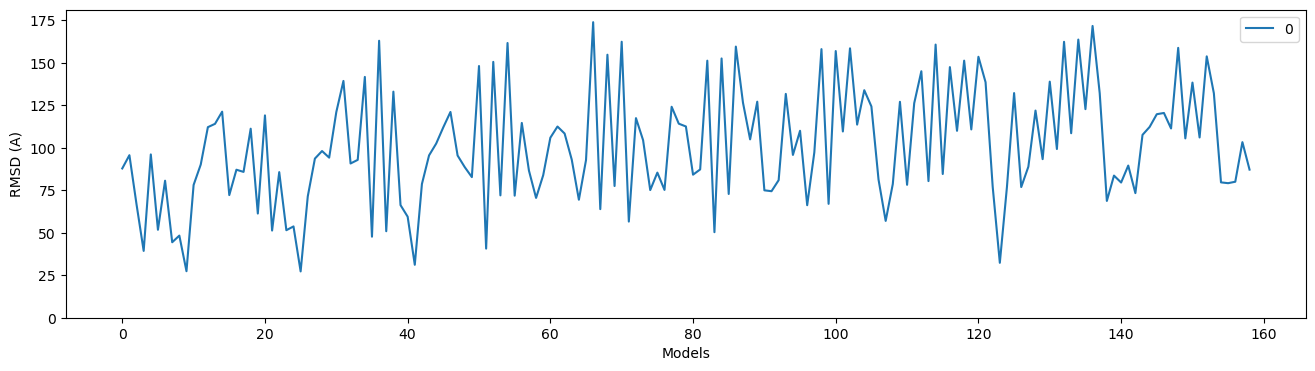

In [10]:
df_ = pd.DataFrame(distance_list)
ax = df_.plot(figsize=(16,4))
ax.set_xlabel("Models")
ax.set_ylabel("RMSD (A)")
ax.set_ylim(0)

#### Residue distance distribution
Calculate distance across models at the residue level (change point of view)

In [11]:
# Swap axes
coords_array = np.array(coords_list)
coords_array = np.swapaxes(coords_array, 0, 1)
coords_array.shape

(152, 160, 3)

In [12]:
# Calculate RMSD at the residue level (all Vs first model)
res_distance = []
for i in range(coords_array.shape[0]):
  distance = []
  for j in range(1, coords_array.shape[1]):
    distance.append(np.sqrt(np.sum(coords_array[i][0] - coords_array[i][j])**2))
  res_distance.append(distance)
res_distance = np.array(res_distance)
res_distance.shape

(152, 159)

Text(0, 0.5, 'Distance (A)')

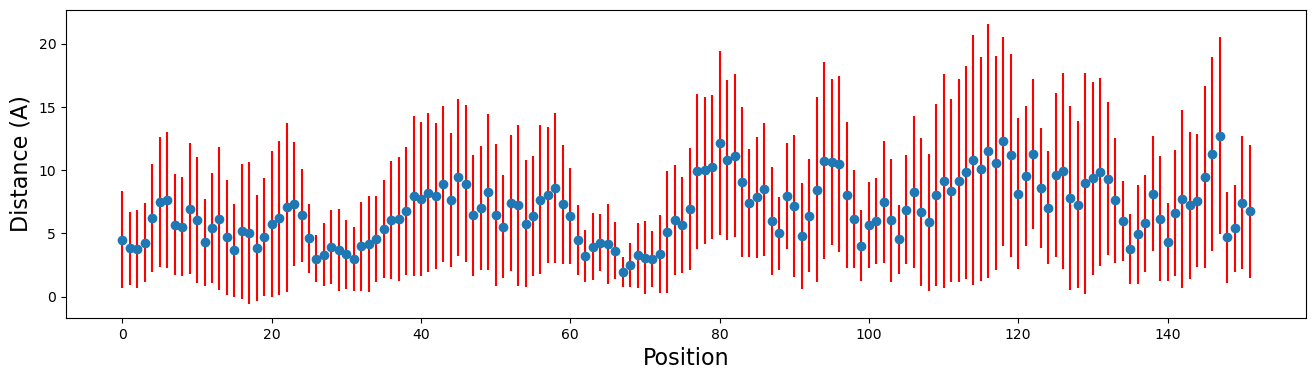

In [13]:
mean = res_distance.mean(axis=1)
std = res_distance.std(axis=1)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std, ecolor='red', fmt = 'o')
plt.xlabel("Position", fontsize=16)
plt.ylabel('Distance (A)', fontsize=16)

## Fragment-based superposition
Superimpose all models to the first model, fragment-by-fragment using a sliding window


In [14]:
window_size = 7
half_window_index = window_size //2 

distance_list = []  # residues x model x fragment

# Iterate models
for i in range(1, df_coords.shape[0]):  
    distance = []

    # Iterate residues
    for j in range(df_coords.shape[1] - window_size):

        # The fragment from the first model
        # Need to stack (convert to a 2D array) for the superposition function
        fragment_reference = np.stack(df_coords.iloc[0, j:j+window_size])
        # print(fragment_reference)

        # Window coordinates (for all models)
        fragment_temp = np.stack(df_coords.iloc[i, j:j+window_size])
        # print(fragment_temp)
       
        # Calculate new coordinates
        fragment_aligned = superimpose(fragment_reference, fragment_temp)
        # print(fragment_aligned)
        #print(np.sum(fragment_reference - fragment_aligned))

        # break
    # break

        # Calculate distance of the fragment
        distance.append(np.sqrt(np.sum((fragment_reference - fragment_aligned))**2))

    distance_list.append(distance)

In [15]:
df_ = pd.DataFrame(distance_list)
df_

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,3.015995e-05,0.000011,0.000005,0.000002,6.437302e-06,5.245209e-06,8.344650e-07,1.072884e-06,0.000025,6.675720e-06,...,3.248453e-06,9.357929e-06,6.437302e-06,0.000005,0.000002,5.960464e-07,0.000005,8.344650e-07,7.390976e-06,5.483627e-06
1,2.026558e-06,0.000011,0.000003,0.000004,1.937151e-06,4.768372e-07,1.394749e-05,1.728535e-05,0.000014,5.722046e-06,...,3.904104e-06,6.228685e-06,1.847744e-06,0.000004,0.000001,7.301569e-06,0.000007,5.722046e-06,1.311302e-05,1.907349e-06
2,1.490116e-05,0.000017,0.000015,0.000013,1.785159e-05,2.264977e-05,1.347065e-05,2.253056e-05,0.000023,3.099442e-06,...,2.950430e-06,5.662441e-07,4.917383e-06,0.000016,0.000006,2.235174e-06,0.000004,3.576279e-06,5.006790e-06,1.645088e-05
3,5.602837e-06,0.000005,0.000006,0.000003,9.030104e-06,2.169609e-05,2.026558e-06,1.442432e-05,0.000005,5.722046e-06,...,2.294779e-06,1.579523e-06,3.129244e-06,0.000003,0.000005,5.602837e-06,0.000007,4.768372e-06,1.192093e-05,1.168251e-05
4,6.198883e-06,0.000005,0.000013,0.000003,1.820922e-05,2.861023e-06,1.978874e-05,2.300739e-05,0.000021,7.152557e-07,...,2.235174e-06,5.066395e-07,5.662441e-07,0.000002,0.000002,8.046627e-07,0.000002,9.536743e-07,2.622604e-06,3.814697e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.072884e-06,0.000016,0.000013,0.000004,7.450581e-07,2.622604e-06,3.337860e-06,2.014637e-05,0.000002,9.775162e-06,...,6.288290e-06,5.364418e-07,3.576279e-06,0.000005,0.000003,2.503395e-06,0.000003,5.841255e-06,5.006790e-06,1.192093e-06
155,6.675720e-06,0.000012,0.000007,0.000030,9.655952e-06,1.287460e-05,6.079674e-06,5.960464e-07,0.000006,1.096725e-05,...,9.447336e-06,4.440546e-06,4.142523e-06,0.000002,0.000007,1.025200e-05,0.000003,1.549721e-06,5.125999e-06,2.384186e-06
156,3.576279e-07,0.000016,0.000000,0.000017,3.308058e-06,9.059906e-06,2.980232e-06,1.132488e-05,0.000017,4.529953e-06,...,2.473593e-06,3.963709e-06,1.549721e-06,0.000010,0.000004,8.940697e-07,0.000007,7.271767e-06,2.384186e-07,3.099442e-06
157,2.026558e-06,0.000009,0.000002,0.000019,9.030104e-06,2.843142e-05,8.761883e-06,2.598763e-05,0.000022,9.536743e-06,...,2.950430e-06,2.473593e-06,1.281500e-06,0.000003,0.000010,7.987022e-06,0.000017,8.702278e-06,1.597404e-05,3.337860e-06


Text(0, 0.5, 'RMSD (A)')

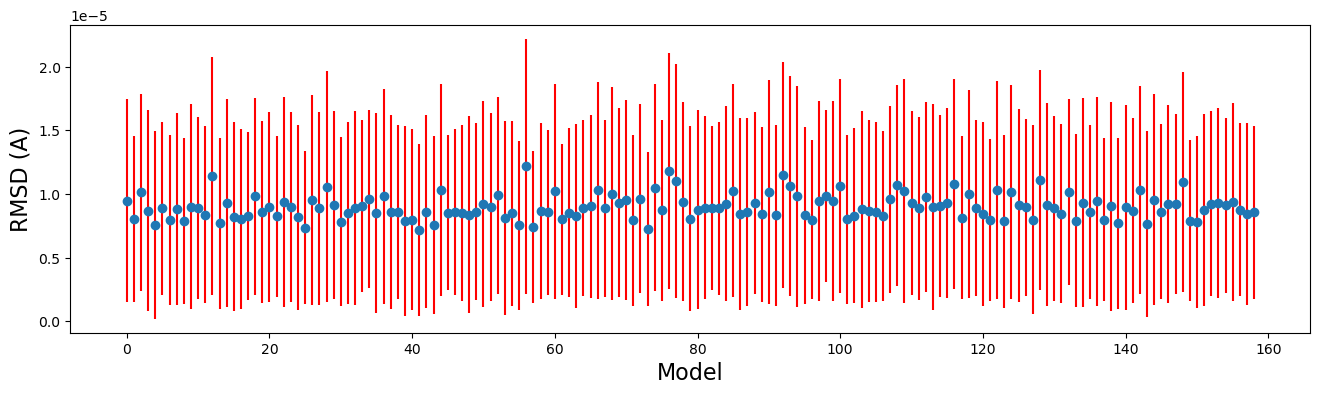

In [16]:
mean = df_.mean(axis=1)
std = df_.std(axis=1)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std,
             ecolor='red', fmt = 'o')
plt.xlabel("Model", fontsize=16)
plt.ylabel('RMSD (A)', fontsize=16)

Text(0, 0.5, 'RMSD (A)')

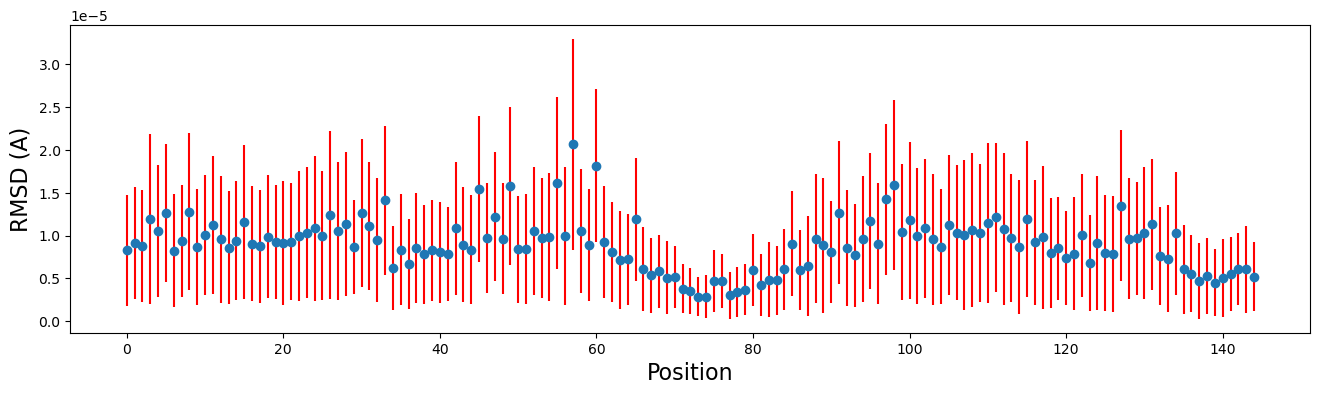

In [17]:
mean = df_.mean(axis=0)
std = df_.std(axis=0)

plt.figure(figsize=(16,4))
plt.errorbar(range(len(mean)), mean, yerr= std,
             ecolor='red', fmt = 'o')
plt.xlabel("Position", fontsize=16)
plt.ylabel('RMSD (A)', fontsize=16)

## Exercise

Compare a couple of different ensembles of the [P38634](https://proteinensemble.org/P38634) entry of the PED database. 
* Compare just one replica for each ensemble, for example PED00001e001 Vs PED00014e004. 
* Consider ensmbles can have multiple chains. 